In [49]:
pip install quandl


In [50]:
import json
import requests
import quandl
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error



In [69]:
quandl.ApiConfig.api_key = ''  #Add API key
incomedata = quandl.get('FRED/MEHOINUSA672N', column_index='1')
unemploymentdata = quandl.get('FRED/NROUST', column_index='1')
GDPdata = quandl.get('FRED/GDP', column_index='1')
INFdata = quandl.get('FRED/CPIAUCSL', column_index='1')
treasurydata = quandl.get('FRED/DTB3', column_index='1')      #Importing data from quandl
golddata = quandl.get('PERTH/LONMETALS', column_index='1')
SPdata = quandl.get('MULTPL/SP500_DIV_YIELD_MONTH', column_index='1')
Debtdata = quandl.get('FRED/GFDEBTN', column_index='1')
CommercialLoansdata = quandl.get('FRED/TOTCI', column_index='1')
silverdata = quandl.get('PERTH/LONMETALS', column_index='3')
populationdata = quandl.get('ODA/USA_LP', column_index='1')
Exportpercentagedata = quandl.get('ODA/USA_TXG_RPCH', column_index='1')





In [70]:
unemploymentdata1 = np.array(unemploymentdata[140:284:4])
GDPdata1 = np.array(GDPdata[148:290:4])
INFdata1 = np.array(INFdata[444:870:12])
treasurydata1 = np.array(treasurydata[7488:16500:251])       #Cut data to equal time sizes
golddata1 = np.array(golddata[4041:13000:253])
SPdata1 = np.array(SPdata[1356:1780:12])
Debtdata1 = np.array(Debtdata[72:215:4])
CommercialLoansdata1 = np.array(CommercialLoansdata[574:2450:53])
silverdata1 = np.array(silverdata[4041:13000:253])
populationdata1 = np.array(populationdata[3:39])
Exportpercentagedata1= np.array(Exportpercentagedata[3:39]) 



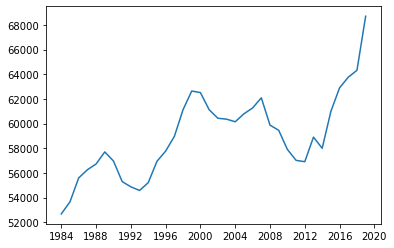

In [71]:
XX = np.array(incomedata)
XX.shape      #Plot income data
plt.plot(incomedata)

In [72]:
data = np.array([XX,unemploymentdata1, GDPdata1,INFdata1, treasurydata1, golddata1, SPdata1, Debtdata1, CommercialLoansdata1, silverdata1, populationdata1, Exportpercentagedata1])
data1=data.reshape((12, 36))
#Create array with all time series

In [73]:
transform = StandardScaler()
data2 = transform.fit_transform(data1)
#transform data

In [74]:
y = data2[0,:]
y = pd.DataFrame(y)
y = y.shift(1) 
y = y.fillna(0)
y = np.array(y)
#creating a time lag and filling NAN with 0

In [75]:
X = data[1:12,:]
#Creates x variable for all time series excluding the income data

In [76]:
X=X.reshape(11,36)
X=np.transpose(X)
y=y.reshape(1,36)
y=np.transpose(y)
X.shape
#Reshaping data to fit

(36, 11)

In [77]:
reg = LinearRegression().fit(X, y)
reg.score(X, y)

reg.coef_

#Predicting the regression coefficients for the associated variables

array([[-6.04732229e-02, -6.75061092e-07, -4.76237559e-03,
         1.03453085e-02, -8.79635133e-05,  2.84379473e-02,
         6.12870667e-09, -3.94323168e-05,  7.78465976e-03,
         5.91130129e-03, -3.25750431e-03]])

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) #Splitting for testing and training data

In [79]:
modelfit = ElasticNet(alpha=0.1, l1_ratio=0.5) #Default parameters
modelfit.fit(X_train, y_train) # Running elastic net

C:\Users\Serena\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01760262480326543, tolerance: 8.574856236466062e-06
  model = cd_fast.enet_coordinate_descent(


ElasticNet(alpha=0.1)

In [80]:
print(modelfit.coef_)   #Printing coefficients

[ 0.00000000e+00  1.02154702e-05 -2.16626599e-03  0.00000000e+00
  6.01131768e-05  0.00000000e+00 -3.13898661e-09  8.74839363e-06
  0.00000000e+00 -0.00000000e+00 -1.94311173e-03]


In [81]:
print(modelfit.intercept_)  #Printing the intercept

[0.0036587]


In [82]:
pred = modelfit.predict(X_test)
score = modelfit.score(X_test, y_test)
mse = mean_squared_error(y_test, pred)
print("R^2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}"
      .format(score, mse, np.sqrt(mse)))
#prediting outcomes using the x-test data and returing the mean squares error, regression score and r-squared value

R^2:0.010, MSE:0.00, RMSE:0.01


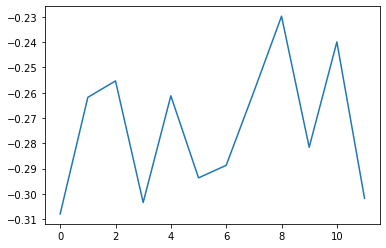

In [83]:
plt.plot(pred)

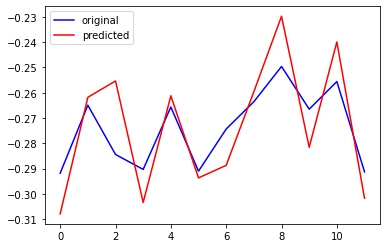

In [84]:
xrange = range(len(X_test))

plt.plot(xrange, y_test,  color="blue", label="original")
plt.plot(xrange, pred, color="red", label="predicted")
plt.legend()
plt.show()
#Printing forecast model with original 

The financial series chosen for analysis is the real median household income for the United States, this has been chosen to identify potential factors that may have affected this over time. All data is sourced annually from 1884 to 2019. Household income is likely to be driven by population, GDP for the US, government debt, unemployment rates, inflation and the volume of loans that are granted commercially. All of these variables have been found along with other correlated time series such as exports in the US, price of silver and the S&P 500 returns which gives an overall insight into the state of the economy over time and how it drives household income.  
Plotting the income time series shows its overall increase over time with the largest decline occurring around 1992 and 2008. This is potentially because of the British Pound collapse in 1992 and the global recession of 2008 reducing overall household income due to repercussions such as high unemployment, increased debt and lower GDP.
The forecast returns a good prediction for the median household income data with a mean squared error of 0. This means that the model is still overfitting the data so would potentially need to be rerun with more data for each time series. This could be potentially obtained by utilising monthly data rather than annual data.
